# Prueba - SQL para Data Science - Sebastián Aguilera Madariaga
## Preparando ambiente de trabajo:

In [24]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")

# Bibliotecas de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn

# Bibliotecas de preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


# Bibliotecas de selección de modelos y evaluación
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    median_absolute_error,
    r2_score,
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Modelos de aprendizaje automático
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

# Serialización y deserialización
import pickle

# Manejo de archivos CSV y bases de datos
import csv
import psycopg2

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Biblioteca relacionadas con el sistema de archivos y el sistema operativo
import os

# Biblioteca para manejo de contraseñas
import pgpasslib

# Funciones personalizadas
from aux_funct import get_data_matching_query
from aux_funct import plot_confusion_matrix
from aux_funct import plot_auc_roc

# Parte 1: Registro de los archivos en la base de datos. (3 Puntos):

- Generar una nueva base de datos con la siguiente nomenclatura: apellido_nombre.
- Importar en tablas los archivos train_cupid.csv y test_cupid.csv a un motor Postgres, implementando solo la librería psycopg2. Las tablas deben contener los nombres de las columnas y el total de los registros presente en cada archivo.

# Previo al código siguiente se creó la base de datos "apellido_nombre" y con el siguiente código en psql se crearon las tablas:

CREATE TABLE test_cupid (
    age INTEGER,
    height REAL,
    virgo INTEGER,
    taurus INTEGER,
    scorpio INTEGER,
    pisces INTEGER,
    libra INTEGER,
    leo INTEGER,
    gemini INTEGER,
    aries INTEGER,
    aquarius INTEGER,
    cancer INTEGER,
    sagittarius INTEGER,
    asian INTEGER,
    hispanic_latino INTEGER,
    black INTEGER,
    indian INTEGER,
    pacific_islander INTEGER,
    native_american INTEGER,
    middle_eastern INTEGER,
    colorado INTEGER,
    new_york INTEGER,
    oregon INTEGER,
    arizona INTEGER,
    hawaii INTEGER,
    montana INTEGER,
    wisconsin INTEGER,
    virginia INTEGER,
    spain INTEGER,
    nevada INTEGER,
    illinois INTEGER,
    vietnam INTEGER,
    ireland INTEGER,
    louisiana INTEGER,
    michigan INTEGER,
    texas INTEGER,
    united_kingdom INTEGER,
    massachusetts INTEGER,
    north_carolina INTEGER,
    idaho INTEGER,
    mississippi INTEGER,
    new_jersey INTEGER,
    florida INTEGER,
    minnesota INTEGER,
    georgia INTEGER,
    utah INTEGER,
    washington INTEGER,
    west_virginia INTEGER,
    connecticut INTEGER,
    tennessee INTEGER,
    rhode_island INTEGER,
    district_of_columbia INTEGER,
    canada INTEGER,
    missouri INTEGER,
    germany INTEGER,
    pennsylvania INTEGER,
    netherlands INTEGER,
    switzerland INTEGER,
    mexico INTEGER,
    ohio INTEGER,
    agnosticism INTEGER,
    atheism INTEGER,
    catholicism INTEGER,
    buddhism INTEGER,
    judaism INTEGER,
    hinduism INTEGER,
    islam INTEGER,
    pro_dogs REAL,
    pro_cats REAL,
    spanish INTEGER,
    chinese INTEGER,
    french INTEGER,
    german INTEGER,
    single INTEGER,
    seeing_someone INTEGER,
    available INTEGER,
    employed INTEGER,
    income_between_25_50 INTEGER,
    income_between_50_75 INTEGER,
    income_over_75 INTEGER,
    drugs_often INTEGER,
    drugs_sometimes INTEGER,
    drinks_not_at_all INTEGER,
    drinks_often INTEGER,
    drinks_rarely INTEGER,
    drinks_socially INTEGER,
    drinks_very_often INTEGER,
    orientation_gay INTEGER,
    orientation_straight INTEGER,
    sex_m INTEGER,
    smokes_sometimes INTEGER,
    smokes_trying_to_quit INTEGER,
    smokes_when_drinking INTEGER,
    smokes_yes INTEGER,
    body_type_overweight INTEGER,
    body_type_regular INTEGER,
    education_high_school INTEGER,
    education_undergrad_university INTEGER
);

# Y

CREATE TABLE train_cupid (
    age INTEGER,
    height REAL,
    virgo INTEGER,
    taurus INTEGER,
    scorpio INTEGER,
    pisces INTEGER,
    libra INTEGER,
    leo INTEGER,
    gemini INTEGER,
    aries INTEGER,
    aquarius INTEGER,
    cancer INTEGER,
    sagittarius INTEGER,
    asian INTEGER,
    hispanic_latino INTEGER,
    black INTEGER,
    indian INTEGER,
    pacific_islander INTEGER,
    native_american INTEGER,
    middle_eastern INTEGER,
    colorado INTEGER,
    new_york INTEGER,
    oregon INTEGER,
    arizona INTEGER,
    hawaii INTEGER,
    montana INTEGER,
    wisconsin INTEGER,
    virginia INTEGER,
    spain INTEGER,
    nevada INTEGER,
    illinois INTEGER,
    vietnam INTEGER,
    ireland INTEGER,
    louisiana INTEGER,
    michigan INTEGER,
    texas INTEGER,
    united_kingdom INTEGER,
    massachusetts INTEGER,
    north_carolina INTEGER,
    idaho INTEGER,
    mississippi INTEGER,
    new_jersey INTEGER,
    florida INTEGER,
    minnesota INTEGER,
    georgia INTEGER,
    utah INTEGER,
    washington INTEGER,
    west_virginia INTEGER,
    connecticut INTEGER,
    tennessee INTEGER,
    rhode_island INTEGER,
    district_of_columbia INTEGER,
    canada INTEGER,
    missouri INTEGER,
    germany INTEGER,
    pennsylvania INTEGER,
    netherlands INTEGER,
    switzerland INTEGER,
    mexico INTEGER,
    ohio INTEGER,
    agnosticism INTEGER,
    atheism INTEGER,
    catholicism INTEGER,
    buddhism INTEGER,
    judaism INTEGER,
    hinduism INTEGER,
    islam INTEGER,
    pro_dogs REAL, -- Cambia esta línea
    pro_cats REAL, -- Cambia esta línea
    spanish INTEGER,
    chinese INTEGER,
    french INTEGER,
    german INTEGER,
    single INTEGER,
    seeing_someone INTEGER,
    available INTEGER,
    employed INTEGER,
    income_between_25_50 INTEGER,
    income_between_50_75 INTEGER,
    income_over_75 INTEGER,
    drugs_often INTEGER,
    drugs_sometimes INTEGER,
    drinks_not_at_all INTEGER,
    drinks_often INTEGER,
    drinks_rarely INTEGER,
    drinks_socially INTEGER,
    drinks_very_often INTEGER,
    orientation_gay INTEGER,
    orientation_straight INTEGER,
    sex_m INTEGER,
    smokes_sometimes INTEGER,
    smokes_trying_to_quit INTEGER,
    smokes_when_drinking INTEGER,
    smokes_yes INTEGER,
    body_type_overweight INTEGER,
    body_type_regular INTEGER,
    education_high_school INTEGER,
    education_undergrad_university INTEGER
);

# Para luego cargar los datos con:

COPY train_cupid FROM 'E:\Cosas del drive\Curso Data scientist\sql para data science\3\clase2\Apoyo Prueba - SQL para Data Science\Apoyo Prueba - SQL para Data Science\train_cupid.csv' DELIMITER ',' CSV HEADER;

# Y

COPY train_cupid FROM 'E:\Cosas del drive\Curso Data scientist\sql para data science\3\clase2\Apoyo Prueba - SQL para Data Science\Apoyo Prueba - SQL para Data Science\test_cupid.csv' DELIMITER ',' CSV HEADER;

In [2]:
# Para cargar los archivos con psycops protegiendo las contraseñas:
# Obtiene la contraseña del archivo pgpass.conf en la ruta C:\Users\sebag\AppData\Roaming\postgresql
password = pgpasslib.getpass("localhost", 5432, "apellido_nombre", "postgres")

# Establece la conexión con el motor de base de datos
conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)

In [3]:
# Probamos el funcionamiento de la conexión a la base de datos realizando unas consultas a los archivos 
# que registramos en la base de datos:

# Crea un objeto 'cursor' que permite interactuar con la base de datos
cursor = conn.cursor()

# Ejecuta una consulta SQL para seleccionar las primeras 15 filas de la tabla 'train_cupid'
cursor.execute('SELECT * FROM train_cupid LIMIT 15;')

# Obtiene y muestra el resultado de la consulta SQL (las 15 filas seleccionadas)
print(cursor.fetchall())

# Cierra el objeto 'cursor' para liberar recursos y evitar posibles conflictos
cursor.close()

[(35, 70.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0), (38, 68.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 1.0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0), (23, 71.0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 1.0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1), (29, 66.0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM test_cupid LIMIT 15;')
print(cursor.fetchall())
cursor.close()

[(22, 75.0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1), (32, 65.0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1), (24, 67.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1), (29, 62.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:
# Crea el DataFrame para la tabla 'train_cupid'
train_cupid_df = pd.read_sql('SELECT * FROM train_cupid', conn)

# Crea el DataFrame para la tabla 'test_cupid'
test_cupid_df = pd.read_sql('SELECT * FROM test_cupid', conn)

# Verificar los DataFrames
train_cupid_df

,age,height,virgo,taurus,scorpio,pisces,libra,leo,gemini,aries,...,orientation_straight,sex_m,smokes_sometimes,smokes_trying_to_quit,smokes_when_drinking,smokes_yes,body_type_overweight,body_type_regular,education_high_school,education_undergrad_university
0,35,70.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,38,68.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,23,71.0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
3,29,66.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,29,67.0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20076,33,63.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20077,22,65.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
20078,28,64.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20079,31,62.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
train_cupid_df.columns

Index(['age', 'height', 'virgo', 'taurus', 'scorpio', 'pisces', 'libra', 'leo',
       'gemini', 'aries', 'aquarius', 'cancer', 'sagittarius', 'asian',
       'hispanic_latino', 'black', 'indian', 'pacific_islander',
       'native_american', 'middle_eastern', 'colorado', 'new_york', 'oregon',
       'arizona', 'hawaii', 'montana', 'wisconsin', 'virginia', 'spain',
       'nevada', 'illinois', 'vietnam', 'ireland', 'louisiana', 'michigan',
       'texas', 'united_kingdom', 'massachusetts', 'north_carolina', 'idaho',
       'mississippi', 'new_jersey', 'florida', 'minnesota', 'georgia', 'utah',
       'washington', 'west_virginia', 'connecticut', 'tennessee',
       'rhode_island', 'district_of_columbia', 'canada', 'missouri', 'germany',
       'pennsylvania', 'netherlands', 'switzerland', 'mexico', 'ohio',
       'agnosticism', 'atheism', 'catholicism', 'buddhism', 'judaism',
       'hinduism', 'islam', 'pro_dogs', 'pro_cats', 'spanish', 'chinese',
       'french', 'german', 'single', 

In [7]:
# encuentra NaNs usando el método isna()
nans = train_cupid_df.isna()

# cuenta el número de NaNs en cada columna
nans_sum = nans.sum()

# imprime el número total de NaNs en el DataFrame
print('Número total de NaNs:', nans_sum.sum())

Número total de NaNs: 0


<AxesSubplot:>

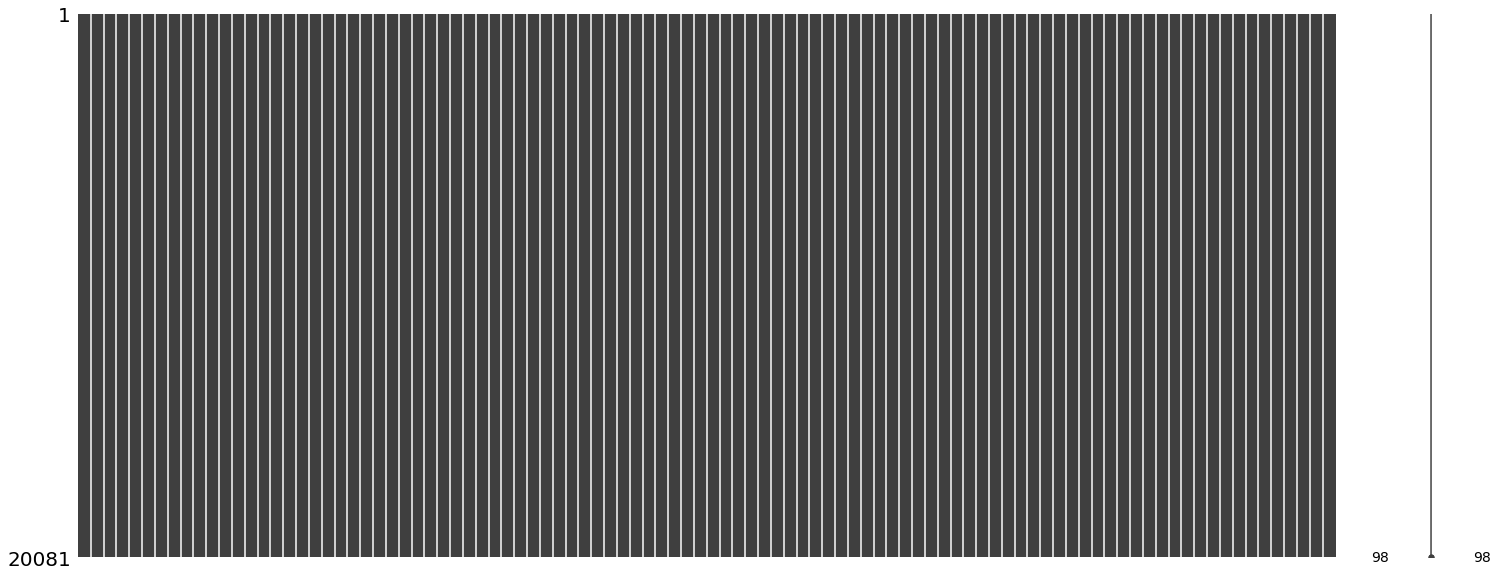

In [8]:
# visualizar la matriz de NaNs usando missigno
msgn.matrix(train_cupid_df)

In [9]:
test_cupid_df

,age,height,virgo,taurus,scorpio,pisces,libra,leo,gemini,aries,...,orientation_straight,sex_m,smokes_sometimes,smokes_trying_to_quit,smokes_when_drinking,smokes_yes,body_type_overweight,body_type_regular,education_high_school,education_undergrad_university
0,22,75.0,0,0,0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,1
1,32,65.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,24,67.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,29,62.0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,39,65.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19938,48,73.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
19939,52,70.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
19940,59,62.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
19941,24,72.0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [10]:
test_cupid_df.columns

Index(['age', 'height', 'virgo', 'taurus', 'scorpio', 'pisces', 'libra', 'leo',
       'gemini', 'aries', 'aquarius', 'cancer', 'sagittarius', 'asian',
       'hispanic_latino', 'black', 'indian', 'pacific_islander',
       'native_american', 'middle_eastern', 'colorado', 'new_york', 'oregon',
       'arizona', 'hawaii', 'montana', 'wisconsin', 'virginia', 'spain',
       'nevada', 'illinois', 'vietnam', 'ireland', 'louisiana', 'michigan',
       'texas', 'united_kingdom', 'massachusetts', 'north_carolina', 'idaho',
       'mississippi', 'new_jersey', 'florida', 'minnesota', 'georgia', 'utah',
       'washington', 'west_virginia', 'connecticut', 'tennessee',
       'rhode_island', 'district_of_columbia', 'canada', 'missouri', 'germany',
       'pennsylvania', 'netherlands', 'switzerland', 'mexico', 'ohio',
       'agnosticism', 'atheism', 'catholicism', 'buddhism', 'judaism',
       'hinduism', 'islam', 'pro_dogs', 'pro_cats', 'spanish', 'chinese',
       'french', 'german', 'single', 

# Luego, se verifica que tienen los nombres, números de filas y columnas correctos. Por lo tanto, asumimos que la importación de datos es correcta.

In [11]:
# encontrar NaNs usando el método isna()
nans = test_cupid_df.isna()

# contar el número de NaNs en cada columna
nans_sum = nans.sum()

# imprimir el número total de NaNs en el DataFrame
print('Número total de NaNs:', nans_sum.sum())

Número total de NaNs: 0


<AxesSubplot:>

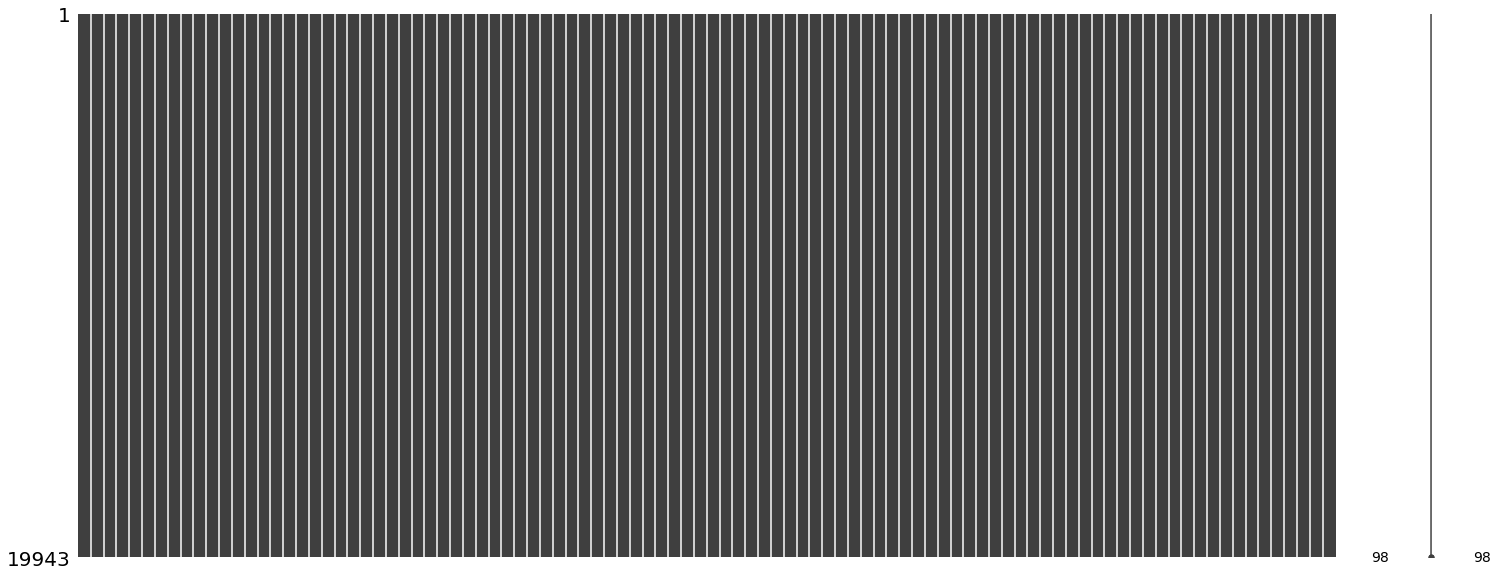

In [12]:
# visualizar la correlación de NaNs usando missigno
msgn.matrix(test_cupid_df)

# No es necesario realizar preprocesamiento de datos. Ya que los archivos csv se encuentran preprocesados.

# Análisis de la distribución de los vectores objetivos: 'single', 'seeing_someone', 'available'.

In [13]:
# Inspección de la distribución porcentual de los vectores objetivos
targets = ['single', 'seeing_someone', 'available']

for target in targets:
    print(f"Distribución para los vectores objetivos: {target}")
    print(train_cupid_df[target].value_counts(normalize=True) * 100)
    print("\n")

Distribución para los vectores objetivos: single
1    91.982471
0     8.017529
Name: single, dtype: float64


Distribución para los vectores objetivos: seeing_someone
0    95.85678
1     4.14322
Name: seeing_someone, dtype: float64


Distribución para los vectores objetivos: available
0    95.85678
1     4.14322
Name: available, dtype: float64




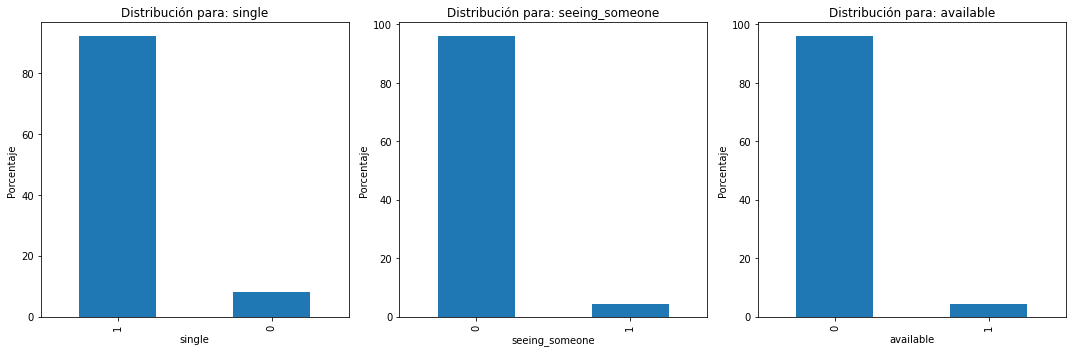

In [14]:
# Inspección de la distribución de los vectores objetivos
targets = ['single', 'seeing_someone', 'available']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for index, target in enumerate(targets):
    counts = train_cupid_df[target].value_counts(normalize=True) * 100
    counts.plot(kind='bar', ax=ax[index])
    ax[index].set_title(f"Distribución para: {target}")
    ax[index].set_xlabel(target)
    ax[index].set_ylabel("Porcentaje")

plt.tight_layout()
plt.show()

# En el gráfico se observa claramente un desequilibrio de las clases por lo que los  modelos pueden verse tentados a clasificar la mayoría de las observaciones como 0, simplemente porque es la clase dominante.

# Parte 2: Entrenamiento de modelos (3.5 Puntos):
Ingestar la tabla de training mediante psycopg2 para el posterior entrenamiento del
modelo.
- Entrenar los siguientes modelos (sin necesidad de ajustar por hiper parámetros): 
- GradientBoostingClassifier, AdaBoostClassifer,
- RandomForestClassifier, SVC, DecisionTreeClassifier,
- LogisticRegression, BernoulliNB.
- Existen tres vectores objetivos a evaluar: single, seeing someone y available.
- Serializar el objeto y preservarlo por cada combinación de modelo entrenado y vector objetivo.

# Para lo anterior, el siguiente código entrena y evalúa varios modelos de clasificación para diferentes vectores objetivos en un conjunto de datos de citas, guarda los modelos serializados en archivos y guarda las predicciones en archivos CSV. Y además, muestra las métricas de evaluación de los modelos.

In [15]:
# Prepara los conjuntos de datos
X_train = train_cupid_df.drop(['single', 'seeing_someone', 'available'], axis=1)
X_test = test_cupid_df.drop(['single', 'seeing_someone', 'available'], axis=1)

In [16]:
# Lista de vectores objetivos y modelos
targets = ['single', 'seeing_someone', 'available']
models = [GradientBoostingClassifier(), AdaBoostClassifier(), RandomForestClassifier(), SVC(), 
          DecisionTreeClassifier(), LogisticRegression(max_iter=1000), BernoulliNB()]

In [17]:
# Crea una carpeta para guardar los modelos serializados y predicciones
if not os.path.exists("trained_models"):
    os.makedirs("trained_models")

if not os.path.exists("predictions"):
    os.makedirs("predictions")

# Define la lista de modelos
model_list = [GradientBoostingClassifier(), AdaBoostClassifier(), RandomForestClassifier(), 
              SVC(probability=True), DecisionTreeClassifier(), LogisticRegression(), BernoulliNB()]

# Itera a través de los vectores objetivos
for target in targets:
    print(f"Evaluando y serializando modelos para los vectores objetivos: {target}")

    y_train = train_cupid_df[target]
    y_test = test_cupid_df[target]

    # Entrena, evalua y serializa cada modelo
    for model in model_list:
        model_name = type(model).__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcula las métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc_roc = roc_auc_score(y_test, y_proba)
        else:
            auc_roc = "N/A"

        print(f"{model_name}:")
        print(f"  Accuracy: {accuracy:.2f}")
        print(f"  Precision: {precision:.2f}")
        print(f"  Recall: {recall:.2f}")
        print(f"  F1-score: {f1:.2f}")
        print(f"  AUC ROC: {auc_roc}")
        print(f"  Confusion Matrix: \n{cm}")

        # Guarda el modelo serializado en un archivo
        model_filename = f"trained_models/{model_name}_{target}.pkl"
        with open(model_filename, "wb") as file:
            pickle.dump(model, file)
        
        print(f"Modelo {model_name} para el vector objetivo {target} guardado como {model_filename}")

        # Guardar las predicciones y probabilidades en un DataFrame
        predictions_df = pd.DataFrame({"prediction": y_pred})
        if hasattr(model, "predict_proba"):
            predictions_df["probability"] = y_proba

        # Guardar el DataFrame en un archivo CSV
        predictions_filename = f"predictions/{model_name}_{target}_predictions.csv"
        predictions_df.to_csv(predictions_filename, index=False)
        
        print(f"Predicciones para el modelo {model_name} y el vector objetivo {target} guardadas en {predictions_filename}")

    print("\n")

Evaluando y serializando modelos para los vectores objetivos: single
GradientBoostingClassifier:
  Accuracy: 0.92
  Precision: 0.92
  Recall: 1.00
  F1-score: 0.96
  AUC ROC: 0.7269602732699199
  Confusion Matrix: 
[[   41  1575]
 [   37 18290]]
Modelo GradientBoostingClassifier para el vector objetivo single guardado como trained_models/GradientBoostingClassifier_single.pkl
Predicciones para el modelo GradientBoostingClassifier y el vector objetivo single guardadas en predictions/GradientBoostingClassifier_single_predictions.csv
AdaBoostClassifier:
  Accuracy: 0.92
  Precision: 0.92
  Recall: 1.00
  F1-score: 0.96
  AUC ROC: 0.7101860041749797
  Confusion Matrix: 
[[   24  1592]
 [   44 18283]]
Modelo AdaBoostClassifier para el vector objetivo single guardado como trained_models/AdaBoostClassifier_single.pkl
Predicciones para el modelo AdaBoostClassifier y el vector objetivo single guardadas en predictions/AdaBoostClassifier_single_predictions.csv
RandomForestClassifier:
  Accuracy: 0

Gráficas para el vector objetivo: single


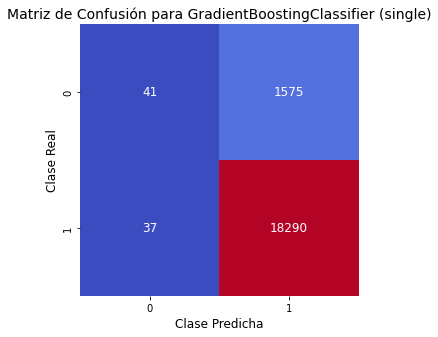

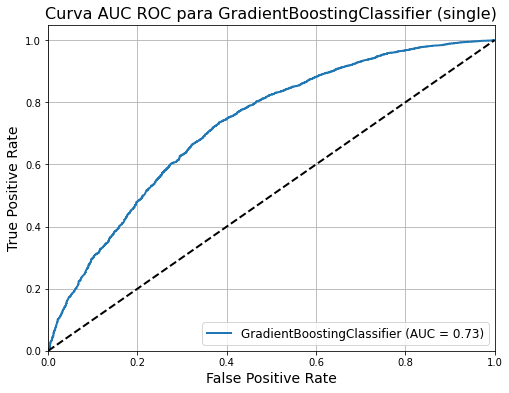

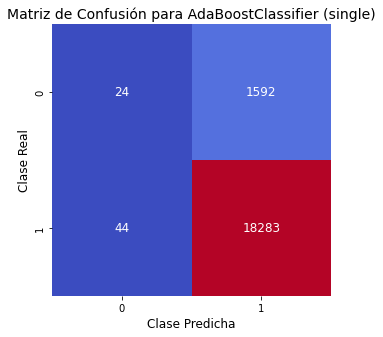

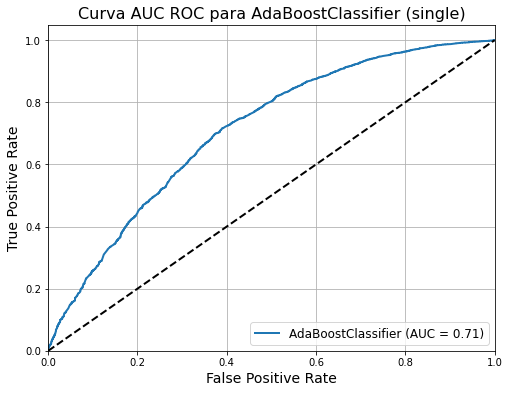

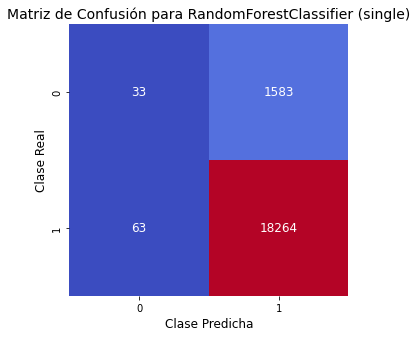

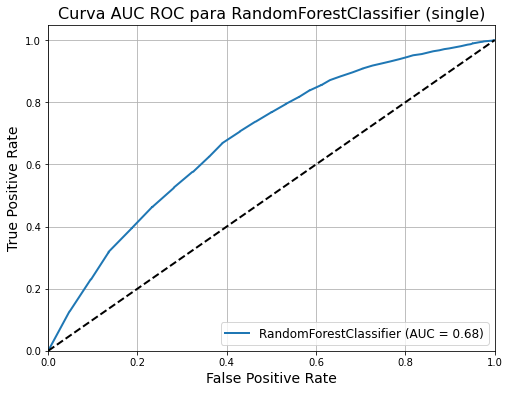

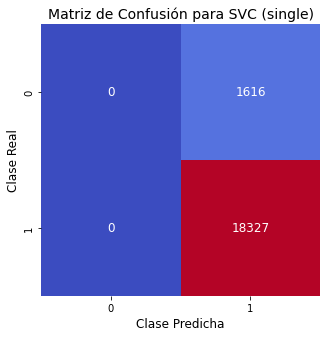

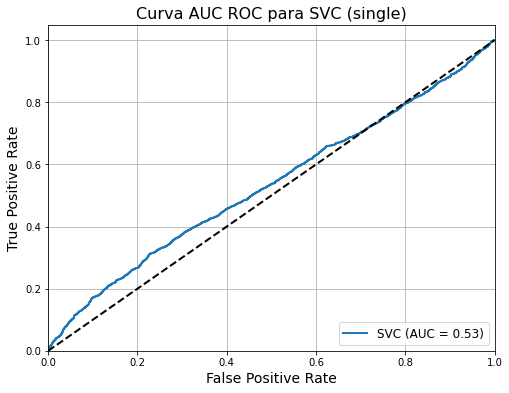

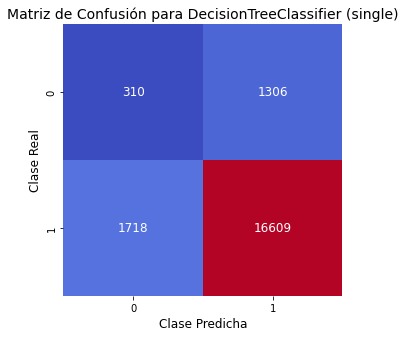

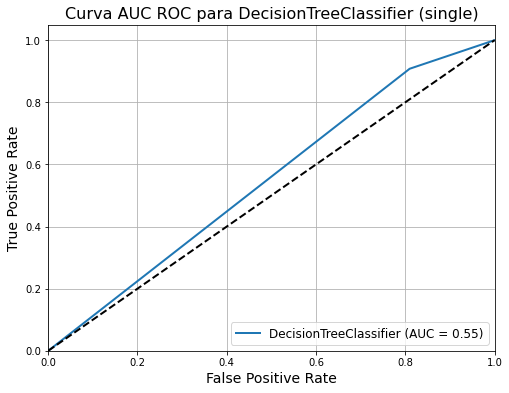

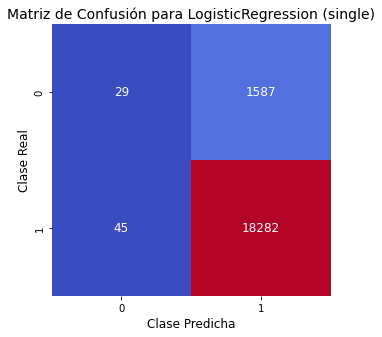

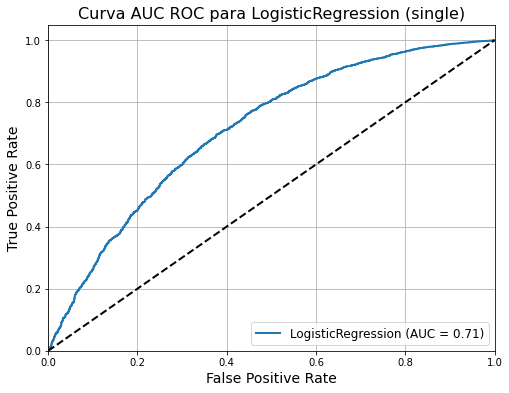

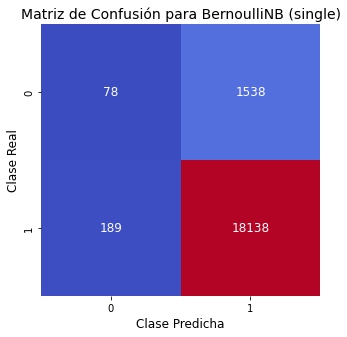

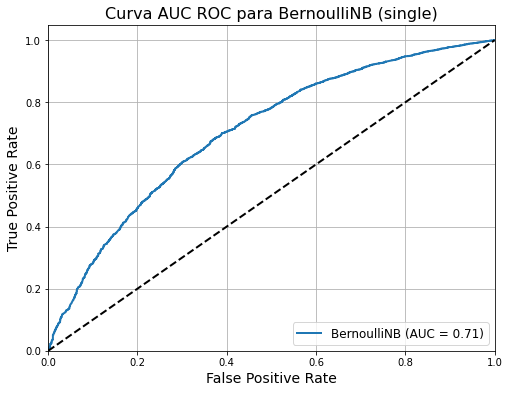



Gráficas para el vector objetivo: seeing_someone


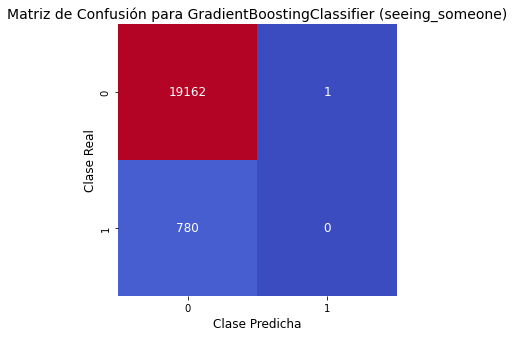

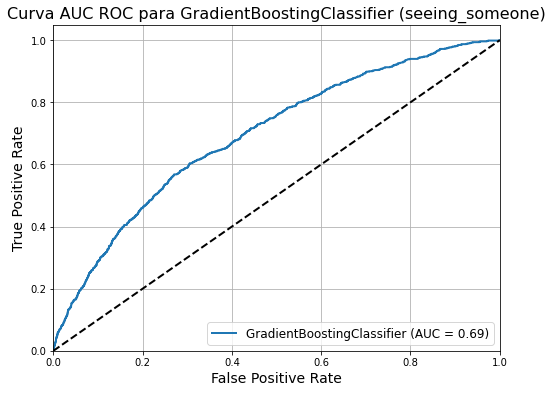

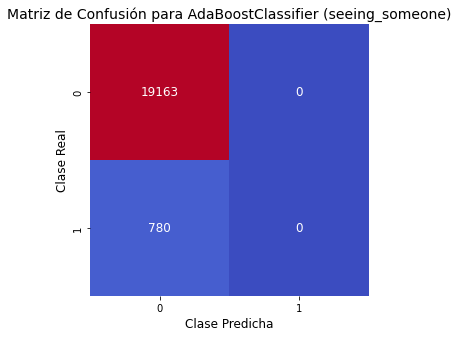

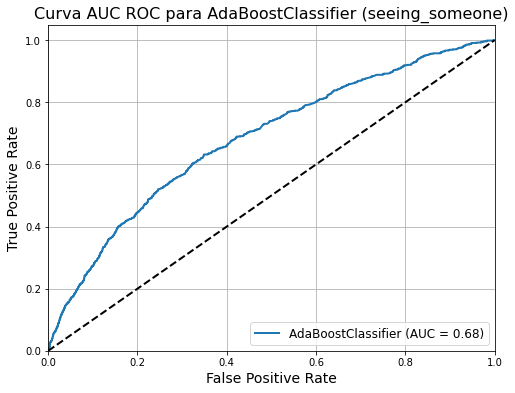

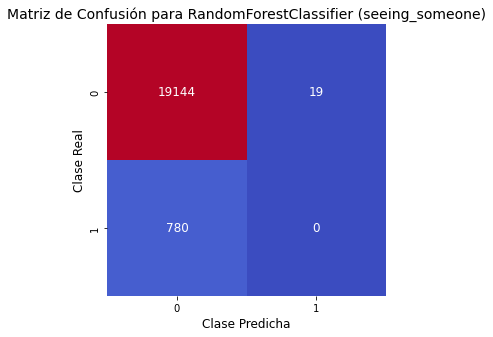

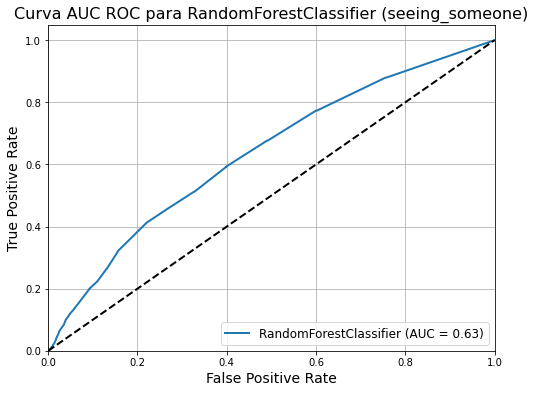

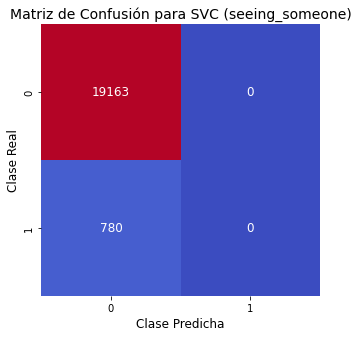

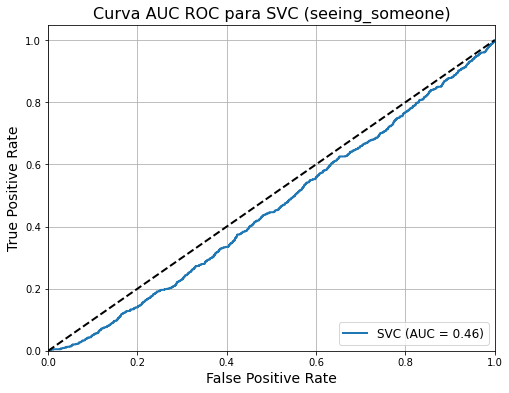

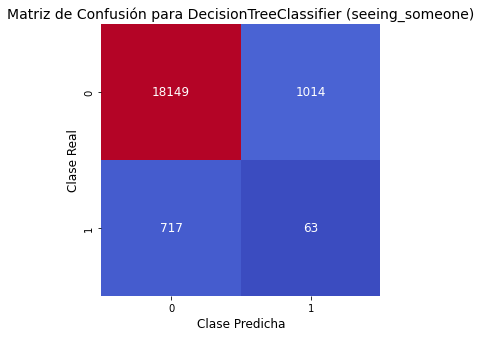

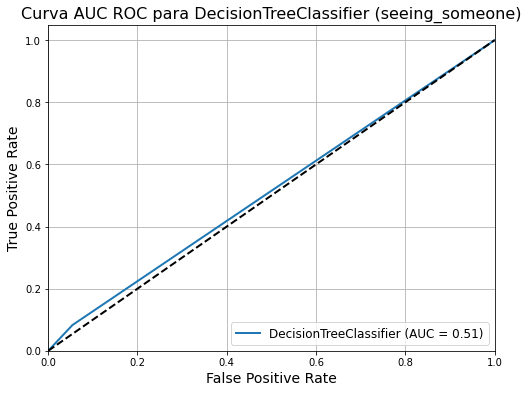

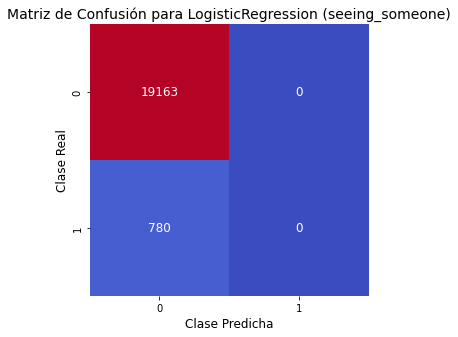

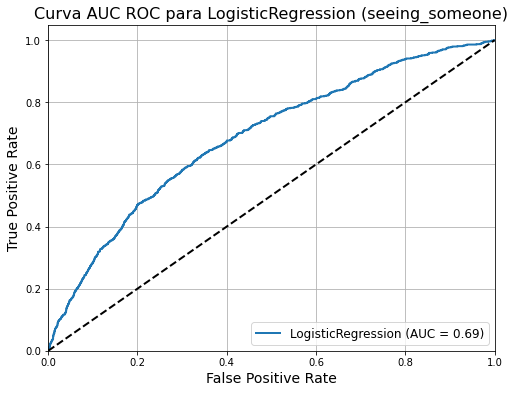

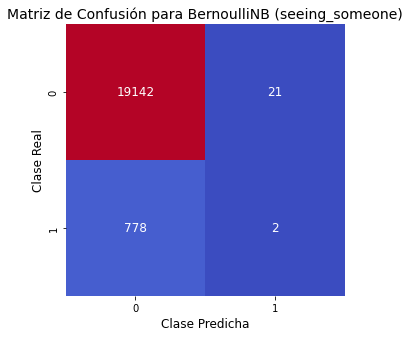

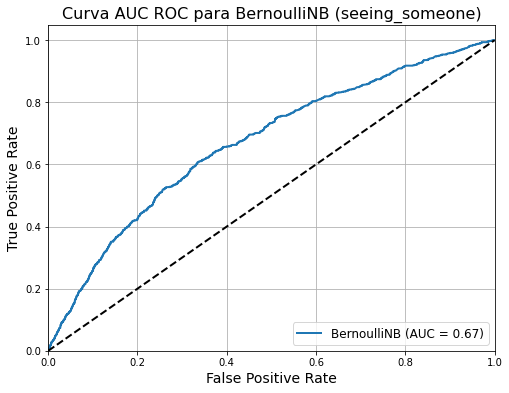



Gráficas para el vector objetivo: available


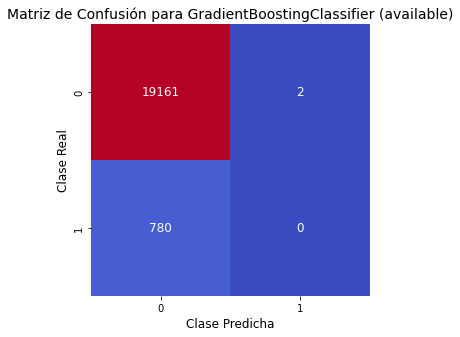

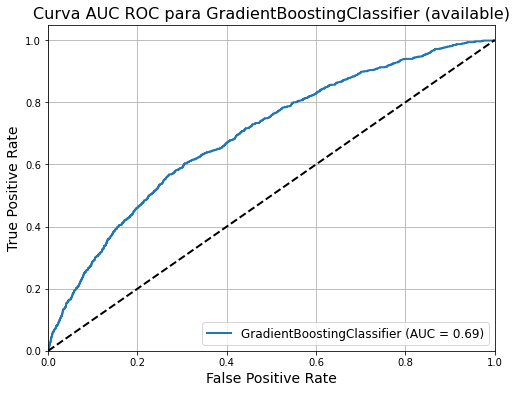

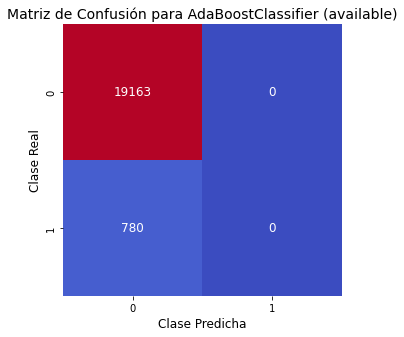

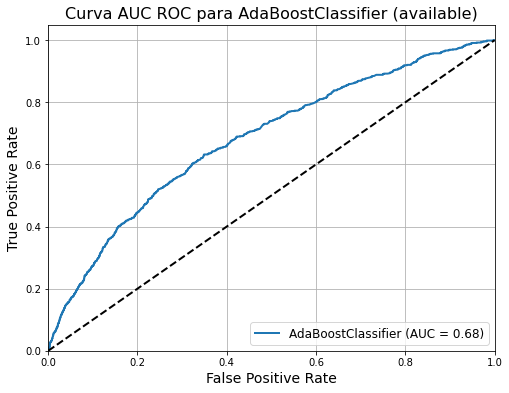

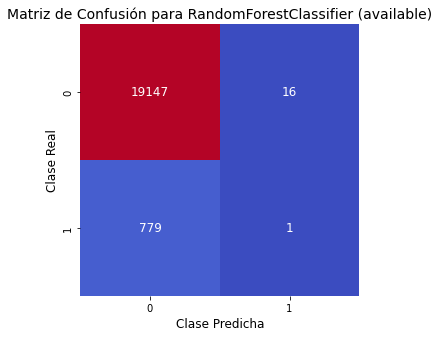

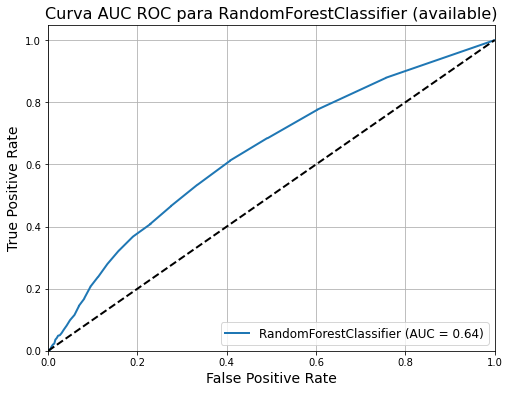

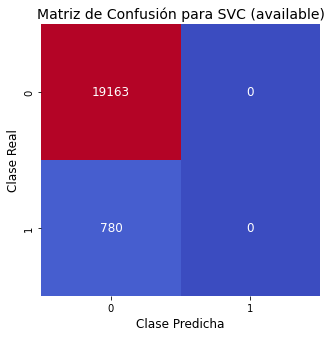

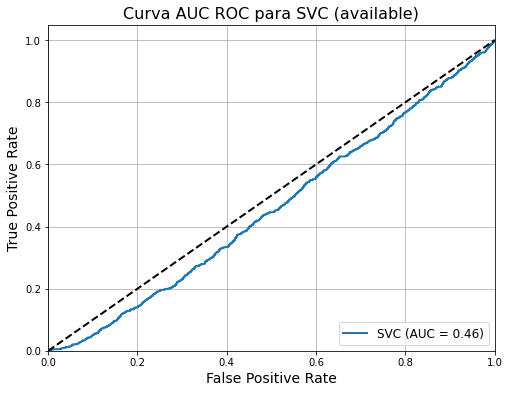

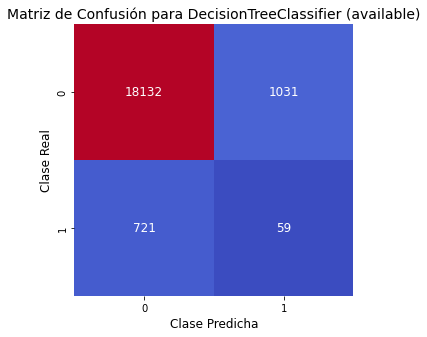

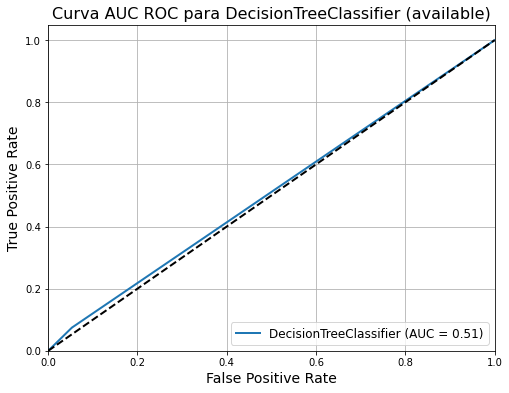

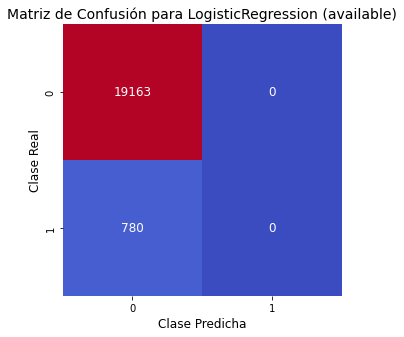

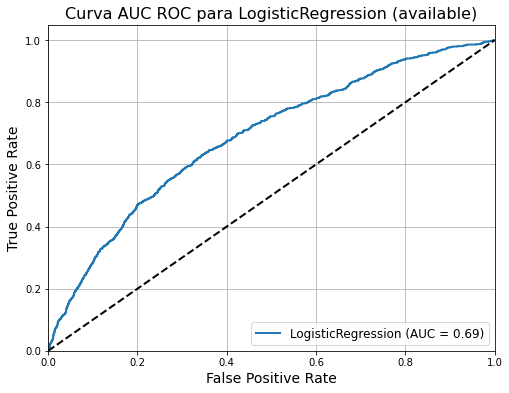

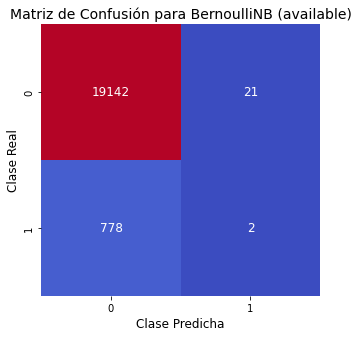

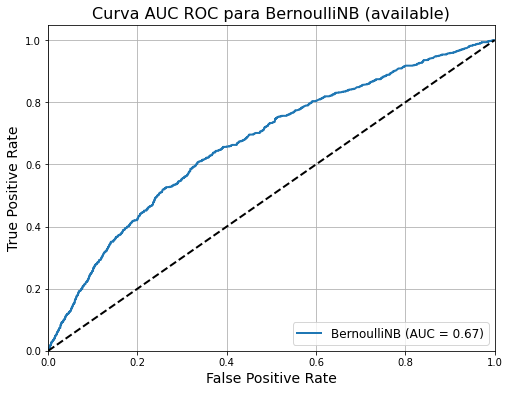

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay

def plot_confusion_matrix(cm, model_name, target):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, annot_kws={"fontsize": 12})
    plt.title(f'Matriz de Confusión para {model_name} ({target})', fontsize=14)
    plt.xlabel('Clase Predicha', fontsize=12)
    plt.ylabel('Clase Real', fontsize=12)
    plt.show()

def plot_auc_roc(y_test, y_proba, model_name, target):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'Curva AUC ROC para {model_name} ({target})', fontsize=16)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.show()

# Itera a través de los vectores objetivos
for target in targets:
    print(f"Gráficas para el vector objetivo: {target}")

    y_train = train_cupid_df[target]
    y_test = test_cupid_df[target]

    # Entrena, evalua y grafica cada modelo
    for model in model_list:
        model_name = type(model).__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcula la matriz de confusión y muestra la gráfica
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, model_name, target)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc_roc = roc_auc_score(y_test, y_proba)
            # Muestra la gráfica AUC ROC
            plot_auc_roc(y_test, y_proba, model_name, target)

    print("\n")

Ranking completo para cada vector objetivo, considerando el AUC ROC y Accuracy:

Para el vector objetivo "single":

- 1.GradientBoostingClassifier: AUC ROC 0.7269602732699199, Accuracy 0.92
- 2.AdaBoostClassifier: AUC ROC 0.7101860041749797, Accuracy 0.92
- 3.LogisticRegression: AUC ROC 0.7124242042390521, Accuracy 0.92
- 4.RandomForestClassifier: AUC ROC 0.6841988427235259, Accuracy 0.92
- 5.BernoulliNB: AUC ROC 0.7051405787165719, Accuracy 0.91
- 6.DecisionTreeClassifier: AUC ROC 0.5463865464955402, Accuracy 0.85
- 7.SVC: AUC ROC 0.5325719857138766, Accuracy 0.92

Para el vector objetivo "seeing_someone":

- 1.GradientBoostingClassifier: AUC ROC 0.6960606510676959, Accuracy 0.96
- 2.LogisticRegression: AUC ROC 0.687553772828782, Accuracy 0.96
- 3.AdaBoostClassifier: AUC ROC 0.6806687767693351, Accuracy 0.96
- 4.RandomForestClassifier: AUC ROC 0.6332779381206036, Accuracy 0.96
- 5.BernoulliNB: AUC ROC 0.6689920279063419, Accuracy 0.96
- 6.DecisionTreeClassifier: AUC ROC 0.5172498551562372, Accuracy 0.91
- 7.SVC: AUC ROC 0.4565600175016759, Accuracy 0.96

Para el vector objetivo "available":

- 1.GradientBoostingClassifier: AUC ROC 0.6961941883196383, Accuracy 0.96
- 2.LogisticRegression: AUC ROC 0.687553772828782, Accuracy 0.96
- 3.AdaBoostClassifier: AUC ROC 0.6806687767693351, Accuracy 0.96
- 4.RandomForestClassifier: AUC ROC 0.635700006824048, Accuracy 0.96
- 5.BernoulliNB: AUC ROC 0.6689920279063419, Accuracy 0.96
- 6.DecisionTreeClassifier: AUC ROC 0.5124536198898251, Accuracy 0.91
- 7.SVC: AUC ROC 0.4565855073278232, Accuracy 0.96

Ahora, la lista incluye los modelos evaluados para cada vector objetivo, teniendo en cuenta tanto el AUC ROC como la Accuracy.

# Parte 3: Exportación de predicciones (3.5 Puntos):

Ingestar la tabla de testing mediante psycopg2 para la posterior predicción del
modelo.
- En base a los objetos serializados, predecir y evaluar cuatro queries específicas:
- Query 1: 'atheism', 'asian', 'employed', 'pro_dogs', 'chinese'.
- Query 2: 'income_over_75', 'french', 'german','orientation_straight', 'new york'.
- Query 3: 'education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'.
- Query 4: 'taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism'.
- Cada una de estas queries específicas debe ser registrada en la base de datos. La base de datos creada debe contener las tablas:
- 2 que representan a training y testing.
- 84 que representan a cada una de las combinaciones entre modelo, vector y query específica.

A modo de referencia, la base de datos creada debe contener 86 tablas en total.

#  Para lo anterior el siguiente código aplica una serie de consultas a los datos, realiza predicciones utilizando varios modelos de clasificación y guarda los resultados en tablas separadas en la base de datos. Entiendo que cuando el valor es 1 coincide con el nombre de la columna y 0 si no coincide.

In [27]:
# Establecer conexión con la base de datos
try:
    conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)
except:
    print("Error: No se pudo conectar a la base de datos")

cursor = conn.cursor()

# Crear el DataFrame para la tabla 'train_cupid'
try:
    cursor.execute("BEGIN")
    train_cupid_df = pd.read_sql('SELECT * FROM train_cupid', conn)
    cursor.execute("COMMIT")
except:
    cursor.execute("ROLLBACK")
    print("Error al leer train_cupid de la base de datos")

# Crea el DataFrame para la tabla 'test_cupid'
try:
    cursor.execute("BEGIN")
    test_cupid_df = pd.read_sql('SELECT * FROM test_cupid', conn)
    cursor.execute("COMMIT")
except:
    cursor.execute("ROLLBACK")
    print("Error al leer test_cupid de la base de datos")

# Verifica los DataFrames
print(train_cupid_df.head())

# Prepara los conjuntos de datos
X_train = train_cupid_df.drop(['single', 'seeing_someone', 'available'], axis=1)
X_test = test_cupid_df.drop(['single', 'seeing_someone', 'available'], axis=1)

# Lista de vectores objetivos y modelos
targets = ['single', 'seeing_someone', 'available']

model_names = ['GradientBoostingClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 
               'SVC', 'DecisionTreeClassifier', 'LogisticRegression', 'BernoulliNB']

queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Carga los modelos serializados para cada combinación de modelo y vector objetivo
models = {}
for target in targets:
    for model_name in model_names:
        filename = f"trained_models/{model_name}_{target}.pkl"
        with open(filename, 'rb') as file:
            models[(model_name, target)] = pickle.load(file)

# Hace predicciones en cada una de las queries específicas y registrar resultados en la base de datos
for query_idx, query in enumerate(queries, start=1):
    query_df = get_data_matching_query(test_cupid_df, query)
    X_query = query_df.drop(['single', 'seeing_someone', 'available'], axis=1)
    
    if X_query.empty:  # Verifica si el conjunto de datos filtrado está vacío
        print(f"La consulta {query_idx} no tiene muestras en el conjunto de datos de prueba. Se omite la evaluación para esta consulta.")
        continue  # Omite la evaluación del modelo para esta consulta
        
    for model_name in model_names:
        for target in targets:
            model = models[(model_name, target)]
            y_query = query_df[target]
            y_pred = model.predict(X_query)
            proba = model.predict_proba(X_query)[:, 1]

            # Registra resultados en la base de datos en la tabla correspondiente
            table_name = f"result_{query_idx}_{model_name}_{target}"
            
            # Elimina la tabla si ya existe
            cursor.execute(f"DROP TABLE IF EXISTS {table_name};")

            # Crea la tabla nuevamente
            cursor.execute(f"CREATE TABLE {table_name} (id SERIAL PRIMARY KEY);")

            # Agrega columnas si no existen
            cursor.execute(f"ALTER TABLE {table_name} ADD COLUMN IF NOT EXISTS prediction INTEGER;")
            cursor.execute(f"ALTER TABLE {table_name} ADD COLUMN IF NOT EXISTS probability FLOAT;")

            # Inserta predicciones y probabilidades en la tabla
            for i, (pred, prob) in enumerate(zip(y_pred, proba)):
                cursor.execute(f"INSERT INTO {table_name} (prediction, probability) VALUES (%s, %s);", (int(pred), float(prob)))

conn.commit()
cursor.close()
conn.close()

   age  height  virgo  taurus  scorpio  pisces  libra  leo  gemini  aries  \
0   35    70.0      0       0        0       0      0    0       0      0   
1   38    68.0      0       0        0       0      0    0       0      0   
2   23    71.0      0       0        0       1      0    0       0      0   
3   29    66.0      0       0        0       0      0    0       0      0   
4   29    67.0      0       1        0       0      0    0       0      0   

   ...  orientation_straight  sex_m  smokes_sometimes  smokes_trying_to_quit  \
0  ...                     1      1                 0                      0   
1  ...                     1      1                 0                      0   
2  ...                     1      1                 0                      0   
3  ...                     1      1                 0                      0   
4  ...                     1      1                 0                      0   

   smokes_when_drinking  smokes_yes  body_type_overweigh

# El siguiente código tiene como objetivo establecer una conexión con la base de datos, para luego recuperar y mostrar las predicciones almacenadas en diferentes tablas:

In [29]:
# Establecer conexión con la base de datos
try:
    conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)
except:
    print("Error: No se pudo conectar a la base de datos")

cursor = conn.cursor()

# Definir los modelos y objetivos
targets = ['single', 'seeing_someone', 'available']
model_names = ['GradientBoostingClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 
               'SVC', 'DecisionTreeClassifier', 'LogisticRegression', 'BernoulliNB']

queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Iterar sobre las consultas, modelos y objetivos para recuperar las predicciones de cada tabla
for query_idx, query in enumerate(queries, start=1):
    for model_name in model_names:
        for target in targets:
            table_name = f"result_{query_idx}_{model_name}_{target}"
            try:
                # Leer la tabla con las predicciones
                query_df = pd.read_sql(f'SELECT * FROM {table_name}', conn)
                print(f"\nTabla: {table_name}")
                print(query_df)
            except Exception as e:
                print(f"Error al leer la tabla {table_name}: {e}")

# Cerrar cursor y conexión
cursor.close()
conn.close()


Tabla: result_1_GradientBoostingClassifier_single
    id  prediction  probability
0    1           1     0.740369
1    2           1     0.936401
2    3           1     0.933702
3    4           1     0.761300
4    5           1     0.929533
5    6           1     0.933702
6    7           1     0.928338
7    8           1     0.934470
8    9           1     0.924601
9   10           1     0.923277
10  11           1     0.933702
11  12           1     0.931739
12  13           1     0.935372
13  14           1     0.939445
14  15           1     0.956442
15  16           1     0.971483
16  17           1     0.935657
17  18           1     0.733011
18  19           1     0.939445
19  20           1     0.942903
20  21           1     0.927822
21  22           1     0.911680
22  23           1     0.929681
23  24           1     0.901085
24  25           1     0.931038
25  26           1     0.931038
26  27           1     0.931038
27  28           1     0.944256
28  29           1   

# Para verificar la cantidad de tablas creadas:

In [31]:
# Establecer conexión con la base de datos
try:
    conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)
except:
    print("Error: No se pudo conectar a la base de datos")

cursor = conn.cursor()

# Consultar la cantidad de tablas en el esquema "public"
cursor.execute("SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = 'public';")
table_count = cursor.fetchone()[0]

print(f"La cantidad de tablas en la base de datos es: {table_count}")

# Cerrar cursor y conexión
cursor.close()
conn.close()

La cantidad de tablas en la base de datos es: 44


# Finalmente, con: pg_dump -U postgres apellido_nombre > apellido_nombre_sql_test.pgsql se exporta el archivo  "volcado" de la base de datos se guarda en el archivo: apellido_nombre_sql_test.pgsql

# Conclusión:


## En el enunciado del problema dice que en la base de datos a modo de referencia debería contener 84 tablas en total considerando que las consultas específicas sean factibles, en total, sin embargo, en la práctica se da que para la consulta 2 y 4 hay un conjunto vacío de datos que sería para las queries: ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'] y ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']. Esto quiere decir que no hay un conjunto de datos que cumpla las condiciones de la consulta por ejemplo, para: ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism'] para filtrar bajo éstas condiciones que deberían ser, en palabras que haya una persona de la india, tauro, con un cierto income, en washington y además hinduista, es decir, son condiciones muy específicas. Entonces, el enunciado del problema pide consultas de las cuales no hay nada que extraer porque no hay datos de prueba que cumplan estas condiciones de las consultas en test_cupid, esa es la razón por la que se generan 44 tablas en la base de datos, es decir, sólo se producen 44 combinaciones entre modelo, vector y query específica. El siguiente código comprueba el número de combinaciones y el código de más abajo muestra los datos de las tablas donde por ejemplo para la consulta de ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism'] debería haber 1 en washington para que se generara un conjunto de datos que satisface la consulta, es por esta razón que no satisface la consulta y no se genera un conjunto de datos de prueba para realizar las predicciones, lo que no quita que se puedan realizar los modelos, pero significa que las predicciones fallarían para éstas consultas donde no se generan datos de prueba o daría un resultado no convincente o sesgado.

## El siguiente código muestra la cantidad de filas que no coinciden con cada condición en la consulta durante la iteración de las consultas. Esto permite ver cuántas filas no cumplen con cada criterio y, por lo tanto, entender por qué no hay coincidencias en algunos casos.

In [32]:
# Establece conexión con la base de datos
try:
    conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)
except:
    print("Error: No se pudo conectar a la base de datos")

cursor = conn.cursor()

# Crear el DataFrame para la tabla 'test_cupid'
try:
    cursor.execute("BEGIN")
    test_cupid_df = pd.read_sql('SELECT * FROM test_cupid', conn)
    cursor.execute("COMMIT")
except:
    cursor.execute("ROLLBACK")
    print("Error al leer test_cupid de la base de datos")

# Verifica el DataFrame
print(test_cupid_df.head())

# Consultas
queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Itera sobre las consultas y obtiene los conjuntos de datos de prueba filtrados
for query_idx, query in enumerate(queries, start=1):
    query_df = get_data_matching_query(test_cupid_df, query)
    print(f"\nConjunto de datos de prueba filtrado para la consulta {query_idx}: {query}")
    print(query_df.head())
    
    # Muestra la cantidad de filas que no coinciden con cada condición en la consulta
    for condition in query:
        unmatched_rows = test_cupid_df[test_cupid_df[condition] != 1].shape[0]
        print(f"Número de filas que no coinciden con '{condition}': {unmatched_rows}")

# Cerrar cursor y conexión
cursor.close()
conn.close()


   age  height  virgo  taurus  scorpio  pisces  libra  leo  gemini  aries  \
0   22    75.0      0       0        0       0      0    0       1      0   
1   32    65.0      1       0        0       0      0    0       0      0   
2   24    67.0      0       0        0       0      0    0       0      0   
3   29    62.0      0       1        0       0      0    0       0      0   
4   39    65.0      0       0        0       0      0    0       0      0   

   ...  orientation_straight  sex_m  smokes_sometimes  smokes_trying_to_quit  \
0  ...                     1      1                 1                      0   
1  ...                     1      0                 0                      0   
2  ...                     1      0                 0                      0   
3  ...                     1      0                 0                      0   
4  ...                     1      0                 0                      0   

   smokes_when_drinking  smokes_yes  body_type_overweigh

## El siguiente código mostrará cuántas filas coinciden con cada condición en la consulta (es decir, tienen un valor igual a 1) durante la iteración de las consultas. Esto te permitirá ver cuántas filas cumplen con cada criterio en el conjunto de datos de prueba.

In [33]:
# Establece conexión con la base de datos
try:
    conn = psycopg2.connect(host="localhost", dbname="apellido_nombre", user="postgres", port=5432, password=password)
except:
    print("Error: No se pudo conectar a la base de datos")

cursor = conn.cursor()

# Crear el DataFrame para la tabla 'test_cupid'
try:
    cursor.execute("BEGIN")
    test_cupid_df = pd.read_sql('SELECT * FROM test_cupid', conn)
    cursor.execute("COMMIT")
except:
    cursor.execute("ROLLBACK")
    print("Error al leer test_cupid de la base de datos")

# Verifica el DataFrame
print(test_cupid_df.head())

# Consultas
queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Itera sobre las consultas y obtiene los conjuntos de datos de prueba filtrados
for query_idx, query in enumerate(queries, start=1):
    query_df = get_data_matching_query(test_cupid_df, query)
    print(f"\nConjunto de datos de prueba filtrado para la consulta {query_idx}: {query}")
    print(query_df.head())
    
    # Muestra la cantidad de filas que coinciden con cada condición en la consulta (igual a 1)
    for condition in query:
        matched_rows = test_cupid_df[test_cupid_df[condition] == 1].shape[0]
        print(f"Número de filas que coinciden con '{condition}': {matched_rows}")

# Cerrar cursor y conexión
cursor.close()
conn.close()

   age  height  virgo  taurus  scorpio  pisces  libra  leo  gemini  aries  \
0   22    75.0      0       0        0       0      0    0       1      0   
1   32    65.0      1       0        0       0      0    0       0      0   
2   24    67.0      0       0        0       0      0    0       0      0   
3   29    62.0      0       1        0       0      0    0       0      0   
4   39    65.0      0       0        0       0      0    0       0      0   

   ...  orientation_straight  sex_m  smokes_sometimes  smokes_trying_to_quit  \
0  ...                     1      1                 1                      0   
1  ...                     1      0                 0                      0   
2  ...                     1      0                 0                      0   
3  ...                     1      0                 0                      0   
4  ...                     1      0                 0                      0   

   smokes_when_drinking  smokes_yes  body_type_overweigh

# El conjunto de datos vacío se debe a que, aunque algunas filas coinciden con las condiciones individuales en una consulta, no hay filas que cumplan con todas las condiciones de la consulta al mismo tiempo.

# Cuando se aplica el filtro get_data_matching_query, las filas deben cumplir con todas las condiciones en la lista de consulta para ser incluidas en el DataFrame resultante. Si no hay filas que cumplan con todas las condiciones simultáneamente, el DataFrame resultante estará vacío.

# Por ejemplo, en la consulta 4:

Hay 305 filas que coinciden con 'taurus'
Hay 301 filas que coinciden con 'indian'
Hay 1 fila que coincide con 'washington'
Hay 1246 filas que coinciden con 'income_between_50_75'
Hay 127 filas que coinciden con 'hinduism'

# Aunque algunas filas cumplen con cada condición por separado, no hay filas que cumplan con todas estas condiciones al mismo tiempo, por lo que el DataFrame resultante está vacío. El siguiente código muestra las columnas filtradas del Dataframe donde se pueden apreciar los datos y en la celda siguiente un gráfico con la distribución de datos donde visualmente se aprecian que no hay datos para washington  y new_york.

In [34]:
# Consultas
queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Itera sobre las consultas y obtiene los DataFrames con las columnas especificadas
filtered_dataframes = []
for query_idx, query in enumerate(queries, start=1):
    query_df = test_cupid_df[query]
    filtered_dataframes.append(query_df)
    print(f"\nDataframe con columnas de la consulta {query_idx}: {query}")
    print(query_df.head())


Dataframe con columnas de la consulta 1: ['atheism', 'asian', 'employed', 'pro_dogs', 'chinese']
   atheism  asian  employed  pro_dogs  chinese
0        0      1         1       0.0        0
1        0      0         1       0.0        0
2        0      0         1       0.0        0
3        0      0         1       0.0        0
4        1      0         1       0.0        0

Dataframe con columnas de la consulta 2: ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york']
   income_over_75  french  german  orientation_straight  new_york
0               0       0       0                     1         0
1               0       0       0                     1         0
2               0       0       0                     1         0
3               0       0       0                     1         0
4               0       0       0                     1         0

Dataframe con columnas de la consulta 3: ['education_undergrad_university', 'body_type_regular', 'pro_dogs


Dataframe con columnas de la consulta 1: ['atheism', 'asian', 'employed', 'pro_dogs', 'chinese']
   atheism  asian  employed  pro_dogs  chinese
0        0      1         1       0.0        0
1        0      0         1       0.0        0
2        0      0         1       0.0        0
3        0      0         1       0.0        0
4        1      0         1       0.0        0


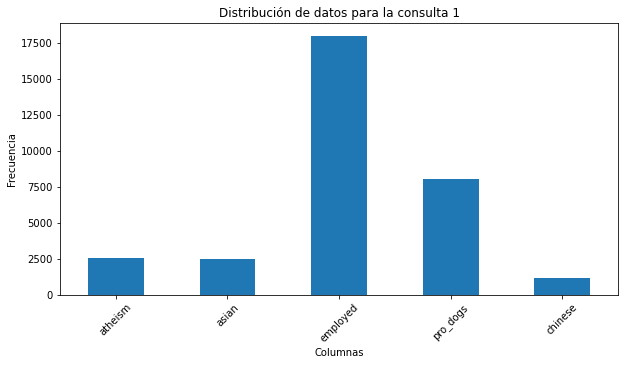


Dataframe con columnas de la consulta 2: ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york']
   income_over_75  french  german  orientation_straight  new_york
0               0       0       0                     1         0
1               0       0       0                     1         0
2               0       0       0                     1         0
3               0       0       0                     1         0
4               0       0       0                     1         0


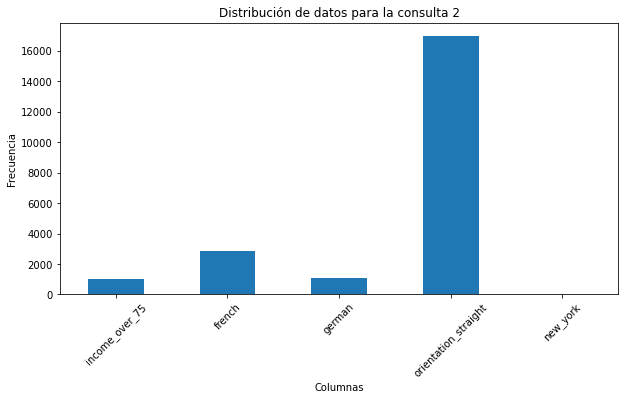


Dataframe con columnas de la consulta 3: ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed']
   education_undergrad_university  body_type_regular  pro_dogs  employed
0                               1                  0       0.0         1
1                               1                  0       0.0         1
2                               1                  0       0.0         1
3                               1                  1       0.0         1
4                               1                  0       0.0         1


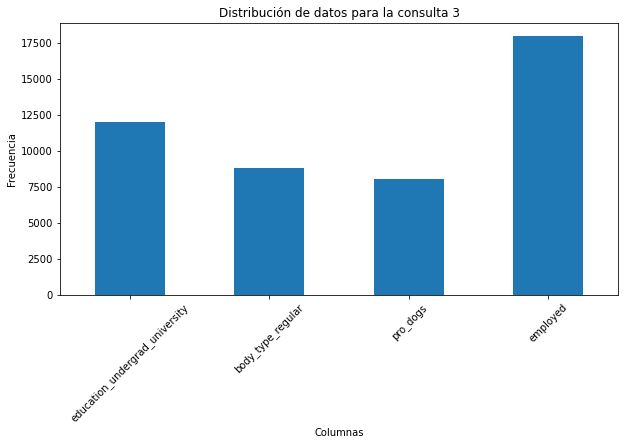


Dataframe con columnas de la consulta 4: ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']
   taurus  indian  washington  income_between_50_75  hinduism
0       0       0           0                     0         0
1       0       0           0                     0         0
2       0       0           0                     0         0
3       1       0           0                     1         0
4       0       0           0                     0         0


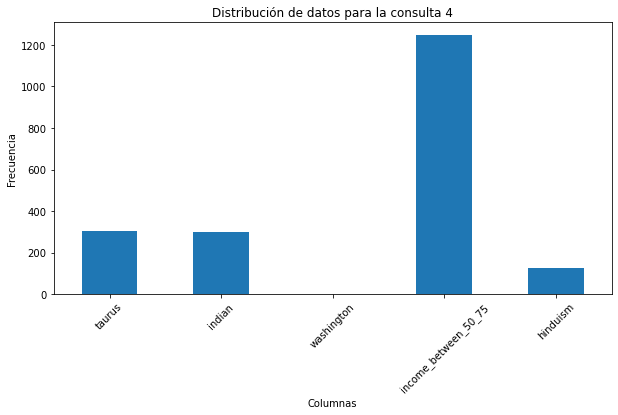

In [35]:
# Consultas
queries = [['atheism', 'asian', 'employed', 'pro_dogs', 'chinese'],
           ['income_over_75', 'french', 'german', 'orientation_straight', 'new_york'],
           ['education_undergrad_university', 'body_type_regular', 'pro_dogs', 'employed'],
           ['taurus', 'indian', 'washington', 'income_between_50_75', 'hinduism']]

# Itera sobre las consultas y obtiene los DataFrames con las columnas especificadas
filtered_dataframes = []
for query_idx, query in enumerate(queries, start=1):
    query_df = test_cupid_df[query]
    filtered_dataframes.append(query_df)
    print(f"\nDataframe con columnas de la consulta {query_idx}: {query}")
    print(query_df.head())

    # Graficar la distribución de datos de las columnas en la consulta
    fig, ax = plt.subplots(figsize=(10, 5))
    query_df.sum().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribución de datos para la consulta {query_idx}")
    ax.set_ylabel("Frecuencia")
    ax.set_xlabel("Columnas")
    plt.xticks(rotation=45)
    plt.show()
